In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
cols = ['Date','Price','Comp','Positive','Negative','Neutral']
df = pd.read_csv('/content/drive/My Drive/Project/finalDemoDataset.csv',usecols=cols)

In [3]:
df

,Date,Price,Comp,Positive,Negative,Neutral
0,2016-06-15,94,0.9997,0.079,0.033,0.887
1,2016-06-14,91,0.9996,0.093,0.045,0.862
2,2016-06-07,93,0.9996,0.072,0.028,0.900
3,2016-06-06,93,1.0000,0.082,0.047,0.871
4,2016-06-05,94,0.9999,0.091,0.047,0.862
...,...,...,...,...,...,...
64,2016-04-06,104,1.0000,0.105,0.039,0.857
65,2016-04-05,102,1.0000,0.092,0.049,0.859
66,2016-04-04,104,1.0000,0.104,0.040,0.856
67,2016-04-03,94,0.9999,0.089,0.047,0.864


In [0]:
maxPrice = df['Price'].max()
df['Price'] /= maxPrice

In [5]:
maxPrice

105

In [0]:
y1 = pd.DataFrame(df['Price'][1:])
y1 = y1.to_numpy()

In [7]:
y1.shape

(68, 1)

In [0]:
X1 = df.drop(['Date'],axis=1)
X1 = X1.drop(X1.index[68])
X1 = X1.to_numpy()

In [9]:
X1.shape[1]

5

In [0]:
arr = [[0.885714,1.0000,0.082,0.047,0.871]]
arr = np.asarray(arr)

In [11]:
arr.shape

(1, 5)

% of positive tweets=  100.0
% of negative tweets=  0.0


[]

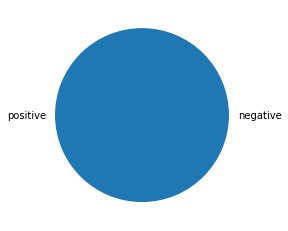

In [12]:
posi=0
nega=0
for i in range (0,len(df)):
    get_val=df.Comp[i]
    if(float(get_val)<(-0.99)):
        nega=nega+1
    if(float(get_val>(-0.99))):
        posi=posi+1
posper=(posi/(len(df)))*100
negper=(nega/(len(df)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
plt.pie(arr,labels=['positive','negative'])
plt.plot()

In [0]:
dataset = pd.read_pickle('/content/drive/My Drive/Project/Twitter_Dataset.pkl')

In [14]:
dataset.rename({'close':'Closed','adj close':'AdjClosed','articles':'Tweets'},axis=1)

,Closed,AdjClosed,Tweets
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...
...,...,...,...
2016-12-27,19945.039062,19945.039062,. Should the U.S. Embassy Be Moved From Tel Av...
2016-12-28,19833.679688,19833.679688,. When Finding the Right Lawyer Seems Daunting...
2016-12-29,19819.779297,19819.779297,. Does Empathy Guide or Hinder Moral Action?. ...
2016-12-30,19762.599609,19762.599609,. Shielding Seized Assets From Corruption’s Cl...


In [15]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
col = ['AdjustedClosed','comp','positive','negative','neutral']
trainingDf = pd.read_csv('/content/drive/My Drive/Project/mergedWithSentiments.csv',usecols=col)

In [17]:
trainingDf

,AdjustedClosed,comp,positive,negative,neutral
0,12469,-0.9814,0.093,0.159,0.749
1,12472,-0.8179,0.099,0.114,0.787
2,12474,-0.9993,0.065,0.198,0.737
3,12480,-0.9982,0.062,0.131,0.806
4,12398,-0.9901,0.082,0.124,0.794
...,...,...,...,...,...
3648,19945,-0.9898,0.103,0.178,0.719
3649,19833,-0.9791,0.120,0.172,0.708
3650,19819,-0.9789,0.097,0.138,0.764
3651,19762,-0.9950,0.098,0.168,0.734


% of positive tweets=  45.5242266630167
% of negative tweets=  54.28415001368738


[]

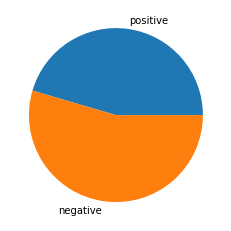

In [20]:
posi=0
nega=0
for i in range (0,len(trainingDf)):
    get_val=trainingDf.comp[i]
    if(float(get_val)<(-0.99)):
        nega=nega+1
    if(float(get_val>(-0.99))):
        posi=posi+1
posper=(posi/(len(trainingDf)))*100
negper=(nega/(len(trainingDf)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
plt.pie(arr,labels=['positive','negative'])
plt.plot()

In [0]:
maxPrice = trainingDf['AdjustedClosed'].max()
trainingDf['AdjustedClosed'] = trainingDf['AdjustedClosed'] / maxPrice

In [0]:
y = pd.DataFrame(trainingDf[1:])

In [0]:
y = y.drop(['comp','positive','negative','neutral'],axis=1)

In [0]:
y = y.to_numpy()

In [0]:
trainingDf = trainingDf.drop(trainingDf.index[3652])
X = pd.DataFrame(trainingDf)

In [0]:
X = X.to_numpy()

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [0]:
def create_mlp(dim, regress=False):
		# define our MLP network
		model = Sequential()
		model.add(Dense(8, input_dim=dim, activation="relu"))
		model.add(Dense(4, activation="relu"))
		# check to see if the regression node should be added
		if regress:
			model.add(Dense(1, activation="linear"))
		# return our model
		return model

In [30]:
model = create_mlp(X.shape[1], regress=True)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)

model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=100, batch_size=32)

Train on 2921 samples, validate on 731 samples
Epoch 1/100
2921/2921 [==============================] - 0s 128us/step - loss: 59.2288 - val_loss: 11.3965
Epoch 2/100
2921/2921 [==============================] - 0s 39us/step - loss: 9.5650 - val_loss: 8.4583
Epoch 3/100
2921/2921 [==============================] - 0s 45us/step - loss: 7.6993 - val_loss: 6.4365
Epoch 4/100
2921/2921 [==============================] - 0s 38us/step - loss: 5.3360 - val_loss: 3.8826
Epoch 5/100
2921/2921 [==============================] - 0s 38us/step - loss: 2.6590 - val_loss: 1.6457
Epoch 6/100
2921/2921 [==============================] - 0s 38us/step - loss: 1.5570 - val_loss: 1.3181
Epoch 7/100
2921/2921 [==============================] - 0s 38us/step - loss: 1.3119 - val_loss: 1.1186
Epoch 8/100
2921/2921 [==============================] - 0s 39us/step - loss: 1.1324 - val_loss: 1.0759
Epoch 9/100
2921/2921 [==============================] - 0s 38us/step - loss: 0.9986 - val_loss: 0.8426
Epoch 10/100
2

**We've trained this neural network using UNITED AIRLINES dataset and tested this network using our APPLE's dataset**

In [0]:
preds = model.predict(X1)

In [0]:
diff = preds.flatten() - y1
percentDiff = (diff / y1) * 100
absPercentDiff = np.abs(percentDiff)

In [0]:
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

In [34]:
print(f'mean:{mean},std:{std}')
#print(f'Prediction{preds*105}')

mean:6.095208683945654,std:4.838726920622789


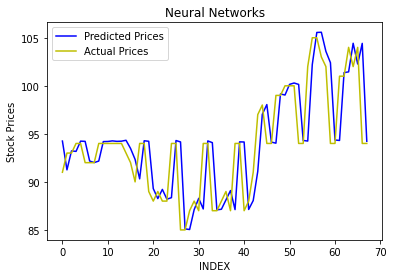

In [41]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(preds*105,color='b',label='Predicted Prices')
ax.plot(y1*105,color='y',label='Actual Prices')
ax.set_xlabel('INDEX')
ax.set_ylabel('Stock Prices')
ax.set_title('Neural Networks')
leg = ax.legend();
#fig.savefig('/content/drive/My Drive/Project/NeuralNetworks.png')

**We've trained and tested this model using UNITED AIRLINE's dataset**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR_LIN: 0.9147118234988307
SVR_POLY: 0.8951636851975504
SVR_RBF: 0.9175544219236813


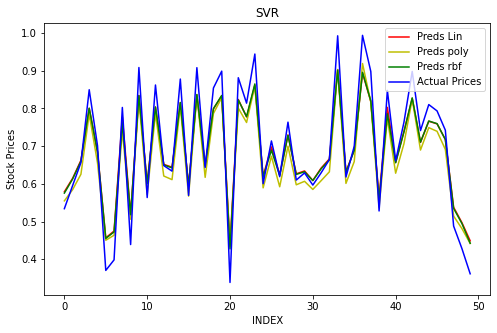

In [36]:
#Support Vector regression
from sklearn.svm import SVR
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

svr_lin = SVR(kernel='linear',C=1e3)
svr_poly = SVR(kernel='poly',C=1e3 ,degree = 2)
svr_rbf = SVR(kernel='rbf' , C=1e3 ,gamma = 0.1)
    
svr_lin.fit(xtrain,ytrain)
svr_poly.fit(xtrain,ytrain)
svr_rbf.fit(xtrain,ytrain)
    
print('SVR_LIN:',svr_lin.score(xtest,ytest))
print('SVR_POLY:',svr_poly.score(xtest,ytest))
print('SVR_RBF:',svr_rbf.score(xtest,ytest))
    
preds_lin = svr_lin.predict(xtest)
preds_poly = svr_poly.predict(xtest)
preds_rbf = svr_rbf.predict(xtest)

fig,ax = plt.subplots()
fig.set_size_inches(8, 5)
ax.plot(preds_lin[0:50]*maxPrice,color='r',label='Preds Lin')
ax.plot(preds_poly[0:50]*maxPrice,color='y',label='Preds poly')
ax.plot(preds_rbf[0:50]*maxPrice,color='g',label='Preds rbf')
ax.plot(ytest[0:50]*maxPrice,color='b',label='Actual Prices')
ax.set_xlabel('INDEX')
ax.set_ylabel('Stock Prices')
ax.set_title('SVR')
leg = ax.legend();
fig.savefig('/content/drive/My Drive/Project/SVR.png')